Pada latihan ini, kita akan menggunakan data “Melbourne Housing Snapshot”. Kalian bisa membaca lebih lanjut penjelasan dataset ini di laman [Kaggle berikut](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot).


In [1]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro
from scipy.stats import kruskal
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('melb_data2.csv',dtype={'Postcode':str})
pd.set_option('display.max_columns', 500)
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Ascot Vale,2/43 Roxburgh St,2,u,455000.0,S,Nelson,3/09/2016,5.9,3032,3.0,1.0,2.0,0.0,NaN,NaN,Moonee Valley,-37.7756,144.9165,Western Metropolitan,6567.0
1,Ascot Vale,30 Rothwell St,3,h,940000.0,S,Nelson,3/12/2016,5.9,3032,3.0,1.0,2.0,298.0,108.0,1920.0,Moonee Valley,-37.7777,144.9195,Western Metropolitan,6567.0
2,Ascot Vale,9/5 Rothwell St,2,u,467000.0,SP,Brad,3/12/2016,5.9,3032,2.0,1.0,1.0,0.0,62.0,1980.0,Moonee Valley,-37.7761,144.9201,Western Metropolitan,6567.0
3,Ascot Vale,7 Francis St,3,h,1380000.0,SP,Nelson,4/03/2017,5.9,3032,3.0,2.0,2.0,277.0,174.0,1910.0,Moonee Valley,-37.7777,144.9221,Western Metropolitan,6567.0
4,Ascot Vale,2/21 Harold St,2,u,490000.0,VB,Jellis,4/03/2017,5.9,3032,2.0,1.0,1.0,423.0,62.0,1970.0,Moonee Valley,-37.7736,144.9015,Western Metropolitan,6567.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         1129 non-null   object 
 1   Address        1129 non-null   object 
 2   Rooms          1129 non-null   int64  
 3   Type           1129 non-null   object 
 4   Price          1129 non-null   float64
 5   Method         1129 non-null   object 
 6   SellerG        1129 non-null   object 
 7   Date           1129 non-null   object 
 8   Distance       1129 non-null   float64
 9   Postcode       1129 non-null   object 
 10  Bedroom2       1129 non-null   float64
 11  Bathroom       1129 non-null   float64
 12  Car            1113 non-null   float64
 13  Landsize       1129 non-null   float64
 14  BuildingArea   601 non-null    float64
 15  YearBuilt      713 non-null    float64
 16  CouncilArea    1079 non-null   object 
 17  Lattitude      1129 non-null   float64
 18  Longtitu

Gunakan hanya kolom-kolom berikut :

Suburb, Address, Rooms, Type, Price, Distance, Landsize, Bedroom2, BuildingArea, Regionname

In [4]:
df=df[['Suburb','Address','Rooms','Type','Price','Distance','Landsize','Bedroom2','BuildingArea','Regionname','Date']]
df

,Suburb,Address,Rooms,Type,Price,Distance,Landsize,Bedroom2,BuildingArea,Regionname,Date
0,Ascot Vale,2/43 Roxburgh St,2,u,455000.0,5.9,0.0,3.0,NaN,Western Metropolitan,3/09/2016
1,Ascot Vale,30 Rothwell St,3,h,940000.0,5.9,298.0,3.0,108.0,Western Metropolitan,3/12/2016
2,Ascot Vale,9/5 Rothwell St,2,u,467000.0,5.9,0.0,2.0,62.0,Western Metropolitan,3/12/2016
3,Ascot Vale,7 Francis St,3,h,1380000.0,5.9,277.0,3.0,174.0,Western Metropolitan,4/03/2017
4,Ascot Vale,2/21 Harold St,2,u,490000.0,5.9,423.0,2.0,62.0,Western Metropolitan,4/03/2017
...,...,...,...,...,...,...,...,...,...,...,...
1124,Carlton,50 Dorrit St,3,h,1760000.0,1.6,9405.0,3.0,134.0,Northern Metropolitan,26/08/2017
1125,Maribyrnong,88 The Esplanade,3,h,3400000.0,4.3,2027.0,3.0,187.0,Western Metropolitan,26/08/2017
1126,North Melbourne,9 Erskine St,2,h,1080000.0,1.8,100.0,2.0,67.0,Northern Metropolitan,26/08/2017
1127,Port Melbourne,44 Garton St,4,t,2455000.0,3.5,123.0,4.0,0.0,Southern Metropolitan,26/08/2017


Sekarang, tugas kalian adalah:  
* Eksplorasi dan berikan gambaran umum dari data di atas (missing value, outliers, descriptive statistics)
    * Coba isi missing value berdasarkan hasil eksplorasi kalian
* Buat analisis sederhana untuk mencari tahu hubungan tiap-tiap variabel dengan kolom `Price`. Lakukan uji statistik untuk mengkonfirmasi temuan kalian!
* Berikan simpulan dari analisis kalian. Saran apa yang bisa kalian berikan **kepada calon pembeli rumah** berdasarkan hasil analisis kalian?

# Data Wrangling

<AxesSubplot:>

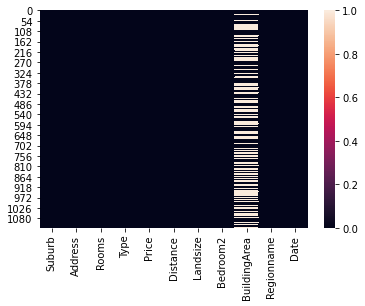

In [5]:
# cek missing value
missing_val=df.isna()
sns.heatmap(missing_val)

In [6]:
missing_val.sum()

Suburb            0
Address           0
Rooms             0
Type              0
Price             0
Distance          0
Landsize          0
Bedroom2          0
BuildingArea    528
Regionname        0
Date              0
dtype: int64

Dikarenakan terdapat Missing Value pada BuildingArea sebanyak 528/1129 data, maka diperlukan penanganan data dengan cara mengisi data missing value berdasarkan hubungan BuildingArea dengan data lain.

Kita menggunakan rata-rata BuildingArea berdasarkan Type, karena semua BuildingArea memiliki klasifikasi Type, dan Type merupakan data dengan tipe kategorikal

In [7]:
df.groupby('Type').mean()['BuildingArea']

Type
h    144.999170
t    115.809167
u     78.300725
Name: BuildingArea, dtype: float64

In [8]:
# Memasukan data kedalam missing value
df['BuildingArea']=df.groupby('Type')['BuildingArea'].apply(lambda x: x.fillna(round(x.mean(),0)))
df[['BuildingArea']]

,BuildingArea
0,78.0
1,108.0
2,62.0
3,174.0
4,62.0
...,...
1124,134.0
1125,187.0
1126,67.0
1127,0.0


Dari data Landsize, ditemukan nilai Landsize=0, namun memiliki Type, Room, Bedroom, dan Building Area. Akan dilakukan pengecekan lebih lanjut untuk data Landsize=0

Berikut adalah penjelasan mengenai tipe rumah:
* H : house,cottage,villa, semi,terrace
* U : unit, duplex
* T : townhouse; dev site - development site

In [9]:
# cek data landsize dengan nilai 0 berdasarkan type
land_0=df[df['Landsize']==0][['Landsize','Type']]
land_0.groupby('Type').count().reset_index()

,Type,Landsize
0,h,21
1,t,22
2,u,377


In [10]:
((df['Landsize']==0)&(df['BuildingArea']==0)).sum() # LANDSIZE 0 DAN BUILDINGAREA 0 TIDAK ADA

0

In [11]:
type_mean=round(df.groupby('Type').mean()[['Landsize']],0).reset_index()
type_mean

,Type,Landsize
0,h,304.0
1,t,202.0
2,u,977.0


In [12]:
# # mengganti landsize=0 di rumah tipe h dan t
index_h=df[(df['Type']=='h')&(df['Landsize']==0)].index
index_t=df[(df['Type']=='t')&(df['Landsize']==0)].index


In [13]:
df.loc[(df['Type']=='h')&(df['Landsize']==0),'Landsize']=304
df.loc[(df['Type']=='t')&(df['Landsize']==0),'Landsize']=202

Data Landsize=0 terdapat pada semua tipe. Hal ini mungkin dikarenakan:
* Data Landsize=0 merupakan bangunan apartemen yang terletak tidak di lantai dasar (untuk tipe U)
* Data Landsize=0 merupakan data outlier/NaN yang dalam bentuk numerik, sehingga data Landsize=0 perlu disubstitusi dengan nilai lain

# Data Analysis dan Data Visualization
Kita akan melakukan analisa dan visualisasi semua data terhadap data Price. Analisa dan visualisasi akan dikategorikan  **berdasarkan data kualitatif (kategorikal,ordinal)** dan **berdasarkan data kuantitatif (diskrit,numerik)**

## Deskripsi Data

In [14]:
# Untuk mengecek data kuantitatif
desc_kuanti=df.describe() 

In [15]:
kolom=['Rooms','Price','Distance','Landsize','Bedroom2','BuildingArea']
hasil=[]
for i in kolom:
    mode_=df[i].mode()
    hasil.append(f' Modus {i}  = {mode_}')      
hasil

[' Modus Rooms  = 0    2\ndtype: int64',
 ' Modus Price  = 0    1100000.0\ndtype: float64',
 ' Modus Distance  = 0    3.3\ndtype: float64',
 ' Modus Landsize  = 0    0.0\ndtype: float64',
 ' Modus Bedroom2  = 0    2.0\ndtype: float64',
 ' Modus BuildingArea  = 0    78.0\ndtype: float64']

In [16]:
desc_kuanti.T

,count,mean,std,min,25%,50%,75%,max
Rooms,1129.0,2.400354e+00,0.891767,1.0,2.0,2.0,3.0,6.0
Price,1129.0,1.008926e+06,586517.307921,210000.0,570000.0,888000.0,1280000.0,5700000.0
Distance,1129.0,3.747033e+00,1.774492,0.0,2.7,3.4,4.3,8.7
Landsize,1129.0,6.153587e+02,2373.917862,0.0,0.0,163.0,321.0,37000.0
Bedroom2,1129.0,2.372896e+00,0.882257,0.0,2.0,2.0,3.0,6.0
BuildingArea,1129.0,1.118686e+02,49.247852,0.0,78.0,102.0,145.0,450.0


Diperoleh nilai sebagai berikut:
* Rooms : jumlah ruangan minimal adalah 1 dan maksimal 6
* Price : harga housing rata-rata adalah 1.008.926 AUD
* Distance : jarak rata-rata dari housing ke Central Business District adalah 3.747033e+00 Km
* Landsize : rata-rata luas tanah adalah 615,3587 m2	
* Bedroom2 : jumlah kamar minimal adalah 0 dan maksimal 6
* BuildingArea : rata-rata luas bangunan adalah 111.8686 m2

In [17]:
# Untuk mengecek data kualitatif
df.describe(include=object)

,Suburb,Address,Type,Regionname,Date
count,1129,1129,1129,1129,1129
unique,17,1115,3,3,57
top,South Yarra,11 Nottingham St,u,Northern Metropolitan,7/05/2016
freq,202,2,520,494,36


Diperoleh nilai sebagai berikut :
* Suburb: memiliki 17 Suburb. South Yarra merupakan suburb dimana rumah paling banyak dijual
* Address : memiliki 1115 alamat. 40 Fawkner St merupakan alamat dimana rumah paling banyak dijual
* Type : memiliki 3 tipe rumah (U,H,T), dimana U meruapakan tipe yang paling banyak dijual
* Regionname : terletak pada 3 region, dimana region yang paling sering muncul adalah Northern Metropolitan
* Date : memiliki penjualan di 57 waktu berbeda, dengan penjualan terbanyak dilakukan pada 07/05/2016

In [18]:
#cek outlier
kolom=['Rooms','Price','Distance','Landsize','Bedroom2','BuildingArea']
kolom_out=[]
for i in kolom:
    q1=df[i].describe()['25%']
    q3=df[i].describe()['75%']
    iqr=q3-q1
    out1=q3+1.5*iqr
    out2=q1-1.5*iqr
    index_out=(df.loc[(df[i]>out1)|(df[i]<out2)]).index
    n_out=df.loc[index_out][i].count()
    kolom_out.append(f'{n_out}')
    
pd.DataFrame({'jumlah outlier':kolom_out},index=kolom)

,jumlah outlier
Rooms,19
Price,39
Distance,81
Landsize,125
Bedroom2,19
BuildingArea,20


Diperoleh jumlah outlier dari masing-masing data. Berdasarkan jumlah outlier dari masing-masing data, diperoleh beberapa data outlier signifikan, antara lain:
* Distance (81)
* Landsize (125)

Maka dari itu perlu dilakukan pengecekan lebih lanjut terhadap data outlier dari masing-masing kolom
**bisa cek masing-masing boxplot**

Kita perlu melakukan pengecekan distribusi data untuk mengetahui jenis metode yang diperlukan dalam analisis data

In [19]:
# cek distribusi data
kolom=['Rooms','Price','Distance','Landsize','Bedroom2','BuildingArea',]
distribusi=[]
for i in kolom:
    stats, pval=shapiro(df[i])
    if pval>0.05:
        distribusi.append('normal')
    else:
        distribusi.append('tidak normal')
        
pd.DataFrame({'distribusi':distribusi},index=kolom)

,distribusi
Rooms,tidak normal
Price,tidak normal
Distance,tidak normal
Landsize,tidak normal
Bedroom2,tidak normal
BuildingArea,tidak normal


Seluruh data memiliki distribusi tidak normal, sehingga dapat dilakukan uji non parameterik menggunakan median dari data

Kita dapat mengecek korelasi (menggunakan spearman karena data non parametrik) dari tiap data untuk mengetahui hubungan antara data, dalam kasus ini adalah data setiap kolom dengan price

<AxesSubplot:>

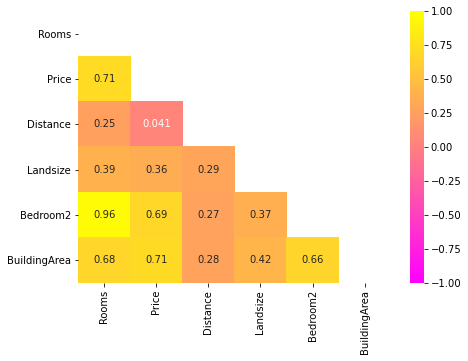

In [20]:
mask=np.triu(np.ones_like(df.corr(method = 'spearman'), dtype=np.bool_))

plt.figure(figsize=(7,5))
sns.heatmap(df.corr(method = 'spearman'), mask=mask, cmap='spring',annot=True, vmin=-1, vmax=1)

Dari hasil korelasi terhadap price, diperoleh bahwa:
* Korelasi dengan data price bersifat positif
* Semakin besar price, semakin besar/tinggi/banyak juga data yang berkorelasi
    * Kesimpulan nilai korelasi:
        * Price & Rooms = 0.71 (korelasi kuat)
        * Price & Distance = 0.041 (korelasi lemah)
        * Price & Landsize = 0.36 (korelasi sedang)
        * Price & Bedrrom2 = 0.69 (korelasi sedang)
        * Price & BuildingArea = 0.71 (korelasi kuat)

## Data Kuantitatif

In [21]:
# ROOM DENGAN PRICE
#Ho: Harga setiap rumah dengan jumlah room tertentu adalah sama
#H1: Setidak satu pasang harga rumah dengan jumlah room tertentu berbeda

stats,pval=kruskal(*[df[df['Rooms']==i]['Price'] for i in df['Rooms'].unique()])
print(pval)   
if pval<=0.05:
    print('Tolak Ho, Setidak satu pasang rumah tinggal dengan jumlah room tertentu berbeda')
else:
    print('Terima Ho,Harga setiap rumah dengan jumlah room tertentu adalah sama')    

1.1515414167716243e-122
Tolak Ho, Setidak satu pasang rumah tinggal dengan jumlah room tertentu berbeda


In [22]:
# harga rumah berdasarkan jumlah ruangan
rooms_price=df.groupby('Rooms').median()[['Price']].reset_index()
rooms_price

,Rooms,Price
0,1,423750.0
1,2,730000.0
2,3,1220000.0
3,4,1608000.0
4,5,1550000.0
5,6,2025000.0


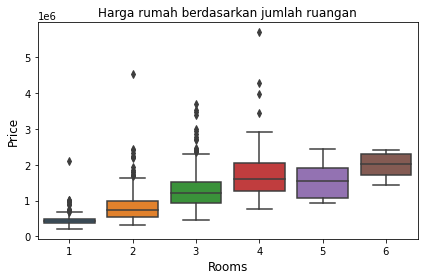

In [23]:
sns.boxplot(data=df,y='Price',x='Rooms') 
plt.title('Harga rumah berdasarkan jumlah ruangan')
plt.xlabel('Rooms', size=12)
plt.ylabel('Price', size=12)
plt.tight_layout()
plt.show()

In [24]:
df.groupby('Rooms').count()

,Suburb,Address,Type,Price,Distance,Landsize,Bedroom2,BuildingArea,Regionname,Date
Rooms,,,,,,,,,,
1,146,146,146,146,146,146,146,146,146,146
2,525,525,525,525,525,525,525,525,525,525
3,341,341,341,341,341,341,341,341,341,341
4,98,98,98,98,98,98,98,98,98,98
5,15,15,15,15,15,15,15,15,15,15
6,4,4,4,4,4,4,4,4,4,4


Berdasarkan visualisasi, diperoleh harga rumah dengan 5 ruangan  lebih rendah dari rumah dengan 4 ruangan. Hal ini dikarenakan:
* Data rumah dengan 4 ruangan memiliki data oulier > q3, sehingga membuat nilai median lebih besar
* Jumlah data rumah dengan 4 ruangan lebih banyak daripada rumah dengan 5 ruangan


In [25]:
# DISTANCE DENGAN PRICE
#Ho: Harga setiap rumah dengan jarak tertentu adalah sama
#H1: Setidak satu pasang harga rumah dengan jarak tertentu tertentu berbeda

stats,pval=kruskal(*[df[df['Distance']==i]['Price'] for i in df['Distance'].unique()])
print(pval)   
if pval<=0.05:
    print('Tolak Ho, Setidak satu pasang harga rumah dengan jarak tertentu tertentu berbeda')
else:
    print('Terima Ho,Harga setiap rumah dengan jarak tertentu adalah sama')    

2.975841031831243e-24
Tolak Ho, Setidak satu pasang harga rumah dengan jarak tertentu tertentu berbeda


In [26]:
df.groupby('Distance').median()[['Price']]

,Price
Distance,
0.0,642500.0
0.7,600000.0
1.2,595000.0
1.3,1300000.0
1.5,872000.0
1.6,920000.0
1.8,928000.0
1.9,995000.0
2.3,655250.0


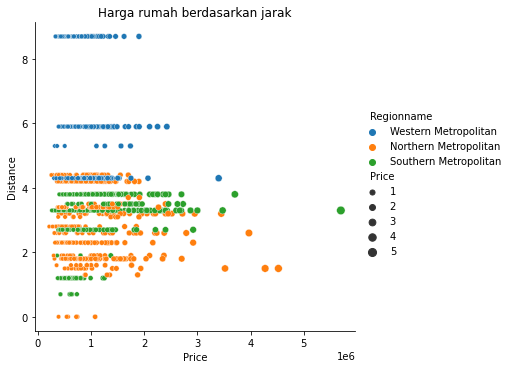

In [27]:
sns.relplot(x='Price', y='Distance', data=df, kind='scatter', size='Price', hue='Regionname')
plt.title('Harga rumah berdasarkan jarak')
plt.show()

Berdasarkan visualisasi data diperoleh bahwa semakin dekat jarak properti dengan CBD, maka semakin mahal pula harga properti.

In [28]:
# BEDROOM2 DENGAN PRICE
#Ho: Harga setiap rumah dengan jumlah bedroom tertentu adalah sama
#H1: Setidaknya satu pasang harga rumah dengan jumlah bedroom tertentu tertentu berbeda

stats,pval=kruskal(*[df[df['Bedroom2']==i]['Price'] for i in df['Bedroom2'].unique()])
print(pval)   
if pval<=0.05:
    print('Tolak Ho, Setidaknya satu pasang harga rumah dengan jumlah bedroom tertentu tertentu berbeda')
else:
    print('Terima Ho,Harga setiap rumah dengan jumlah bedroom tertentu adalah sama')    

5.23778196110766e-113
Tolak Ho, Setidaknya satu pasang harga rumah dengan jumlah bedroom tertentu tertentu berbeda


In [29]:
df.groupby('Bedroom2').median('Price')

,Rooms,Price,Distance,Landsize,BuildingArea
Bedroom2,,,,,
0.0,2,703500.0,2.1,0.0,70.5
1.0,1,425000.0,3.3,0.0,78.0
2.0,2,750000.0,3.3,103.0,78.0
3.0,3,1202500.0,3.8,216.5,145.0
4.0,4,1581000.0,3.8,298.0,145.0
5.0,5,1585000.0,7.3,457.0,186.5
6.0,6,2250000.0,5.9,1012.0,435.0


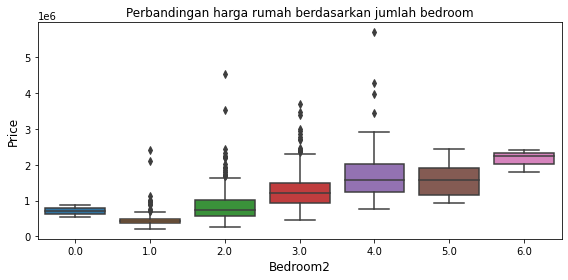

In [30]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df,y='Price',x='Bedroom2') 
plt.xlabel('Bedroom2', size=12)
plt.ylabel('Price', size=12)
plt.title ('Perbandingan harga rumah berdasarkan jumlah bedroom', size=12)
plt.tight_layout()
plt.show()

In [31]:
df.groupby('Bedroom2').count()

,Suburb,Address,Rooms,Type,Price,Distance,Landsize,BuildingArea,Regionname,Date
Bedroom2,,,,,,,,,,
0.0,2,2,2,2,2,2,2,2,2,2
1.0,147,147,147,147,147,147,147,147,147,147
2.0,539,539,539,539,539,539,539,539,539,539
3.0,330,330,330,330,330,330,330,330,330,330
4.0,94,94,94,94,94,94,94,94,94,94
5.0,14,14,14,14,14,14,14,14,14,14
6.0,3,3,3,3,3,3,3,3,3,3


Berdasarkan visualisasi, diperoleh harga rumah dengan 0 bedroom  lebih tinggi dari rumah dengan 1 bedroom . Hal ini dikarenakan:
* Jumlah data rumah dengan 0 bedroom lebih sedikit daripada rumah dengan 1 bedroom


In [32]:
# LANDSIZE DENGAN PRICE
#Ho: Harga setiap rumah dengan landsize tertentu adalah sama
#H1: Setidaknya satu pasang harga rumah dengan landsize tertentu tertentu berbeda

stats,pval=kruskal(*[df[df['Landsize']==i]['Price'] for i in df['Landsize'].unique()])
print(pval)   
if pval<=0.05:
    print('Tolak Ho, Setidaknya satu pasang rumah tinggal dengan landsize tertentu tertentu berbeda')
else:
    print('Terima Ho,Harga setiap rumah dengan landsize tertentu adalah sama')    

1.1427305211126848e-19
Tolak Ho, Setidaknya satu pasang rumah tinggal dengan landsize tertentu tertentu berbeda


In [33]:
#Kategorikan ukuran landsize kedalam klasifikasi berikut
#pembagian berdasarkan nilai q1,q2,q3
#kecil: <163
#sedang: 164-321
#besar: >321

In [34]:
q1=df['Landsize'].describe()['25%']
q3=df['Landsize'].describe()['50%']
q3

163.0

In [35]:
#buat dataframe baru untuk kategori landsize
price_land_small=df[df['Landsize']<163].median()['Price']
price_land_med=df[(df['Landsize']>164)|df['Landsize']<321].median()['Price']
price_land_large=df[df['Landsize']>321].median()['Price']

dict1={
    'Landsize':['Small','Medium','Large'],
    'Price':[price_land_small,price_land_med,price_land_large],
}
land_price=pd.DataFrame(dict1)
land_price

,Landsize,Price
0,Small,680500.0
1,Medium,888000.0
2,Large,955000.0


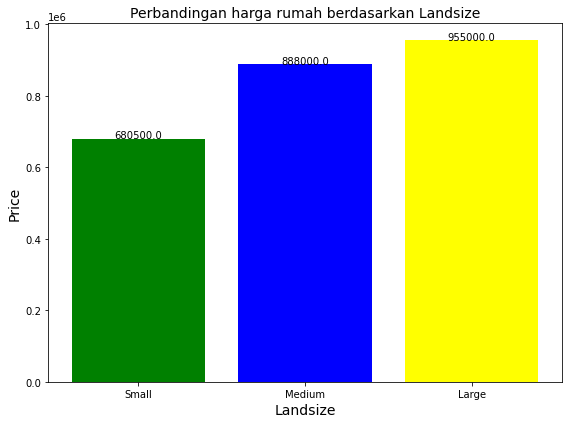

In [36]:
def addlabel (x,y):
     for i in range(len(x)):
        plt.text(i,y[i],y[i], ha='center')
plt.figure(figsize=(8,6))
x=land_price['Landsize']
y=land_price['Price']
plt.bar(x,y,color=['green','blue','yellow'])
addlabel(x,y)
plt.xlabel('Landsize', size=14)
plt.ylabel('Price', size=14)
plt.title ('Perbandingan harga rumah berdasarkan Landsize', size=14)
plt.tight_layout()
plt.show()

Dari hasil visualisasi, didapatkan bahwa semakin besar ukuran luas tanah maka akan semakin besar pula harga properti. Berikut adalah harga median dari properti berdasarkan luas tanah:
* Landsize small (<163 m2) memiliki harga median 680.500 AUD
* Landsize medium (164-321 m2) memiliki harga median 888.000 AUD
* Landsize large (>321 m2) memiliki harga median 955.000 AUD

In [37]:
# BUILDINGAREA DENGAN PRICE
#Ho: Harga setiap rumah dengan BuildingArea tertentu adalah sama
#H1: Setidaknya satu pasang harga rumah dengan BuildingArea tertentu  berbeda

stats,pval=kruskal(*[df[df['BuildingArea']==i]['Price'] for i in df['BuildingArea'].unique()])
print(pval)   
if pval<=0.05:
    print('Tolak Ho, Setidaknya satu pasang harga rumah dengan BuildingArea tertentu  berbeda')
else:
    print('Terima Ho,Harga setiap rumah dengan BuildingArea tertentu adalah sama')    

6.1175278300710375e-58
Tolak Ho, Setidaknya satu pasang harga rumah dengan BuildingArea tertentu  berbeda


In [38]:
#Kategorikan ukuran BuildingArea kedalam klasifikasi berikut
#pembagian berdasarkan nilai q1,q2,q3 dari landsize
#kecil: <163
#sedang: 164-321
#besar: >321

In [39]:
#buat dataframe baru untuk kategori BuildingArea
price_BuildArea_small=df[df['BuildingArea']<163].median()['Price']
price_BuildArea_med=df[(df['BuildingArea']>164)|df['Landsize']<321].median()['Price']
price_BuildArea_large=df[df['BuildingArea']>321].median()['Price']

dict2={
    'BuildArea':['Small','Medium','Large'],
    'Price':[price_BuildArea_small,price_BuildArea_med,price_BuildArea_large],
}
BuildArea_price=pd.DataFrame(dict2)
BuildArea_price

,BuildArea,Price
0,Small,841000.0
1,Medium,888000.0
2,Large,2255000.0


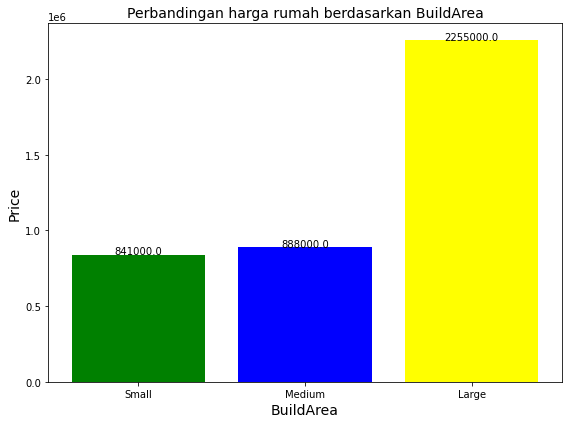

In [40]:
def addlabel (x,y):
     for i in range(len(x)):
        plt.text(i,y[i],y[i], ha='center')
plt.figure(figsize=(8,6))
x=BuildArea_price['BuildArea']
y=BuildArea_price['Price']
plt.bar(x,y,color=['green','blue','yellow'])
addlabel(x,y)
plt.xlabel('BuildArea', size=14)
plt.ylabel('Price', size=14)
plt.title ('Perbandingan harga rumah berdasarkan BuildArea', size=14)
plt.tight_layout()
plt.show()

Dari hasil visualisasi, didapatkan bahwa semakin besar luas bangunan maka akan semakin besar pula harga properti. Berikut adalah harga median dari properti berdasarkan luas bangunan:
* Landsize small (<163 m2) memiliki harga median 841.000 AUD
* Landsize medium (164-321 m2) memiliki harga median 888.000 AUD
* Landsize large (>321 m2) memiliki harga median 2.255.000 AUD

## Data Kualitatif

In [41]:
# ADDRESS DENGAN PRICE TIDAK DICARI, KARENA ADDRESS TIDAK MEMILIKI KATEGORI SPESIFIK

In [42]:
# SUBURB DENGAN PRICE
#Ho: Harga rumah di setiap suburb adalah sama
#H1: Setidaknya harga rumah di satu pasang suburb berbeda

stats,pval=kruskal(*[df[df['Suburb']==i]['Price'] for i in df['Suburb'].unique()])
print(pval)   
if pval<=0.05:
    print('Tolak Ho, Setidaknya harga rumah di satu pasang suburb berbeda')
else:
    print('Terima Ho, Harga rumah di setiap suburb adalah sama')    

1.6040624861205967e-27
Tolak Ho, Setidaknya harga rumah di satu pasang suburb berbeda


In [43]:
pv_Suburb=df.pivot_table(index='Suburb',values='Price',aggfunc='median').sort_values(by='Price').reset_index()
pv_Suburb

,Suburb,Price
0,Melbourne,542500.0
1,Southbank,600000.0
2,North Melbourne,780000.0
3,Docklands,800000.0
4,South Yarra,802000.0
5,Kensington,812000.0
6,Maribyrnong,820000.0
7,East Melbourne,897500.0
8,Flemington,917500.0
9,Carlton,957000.0


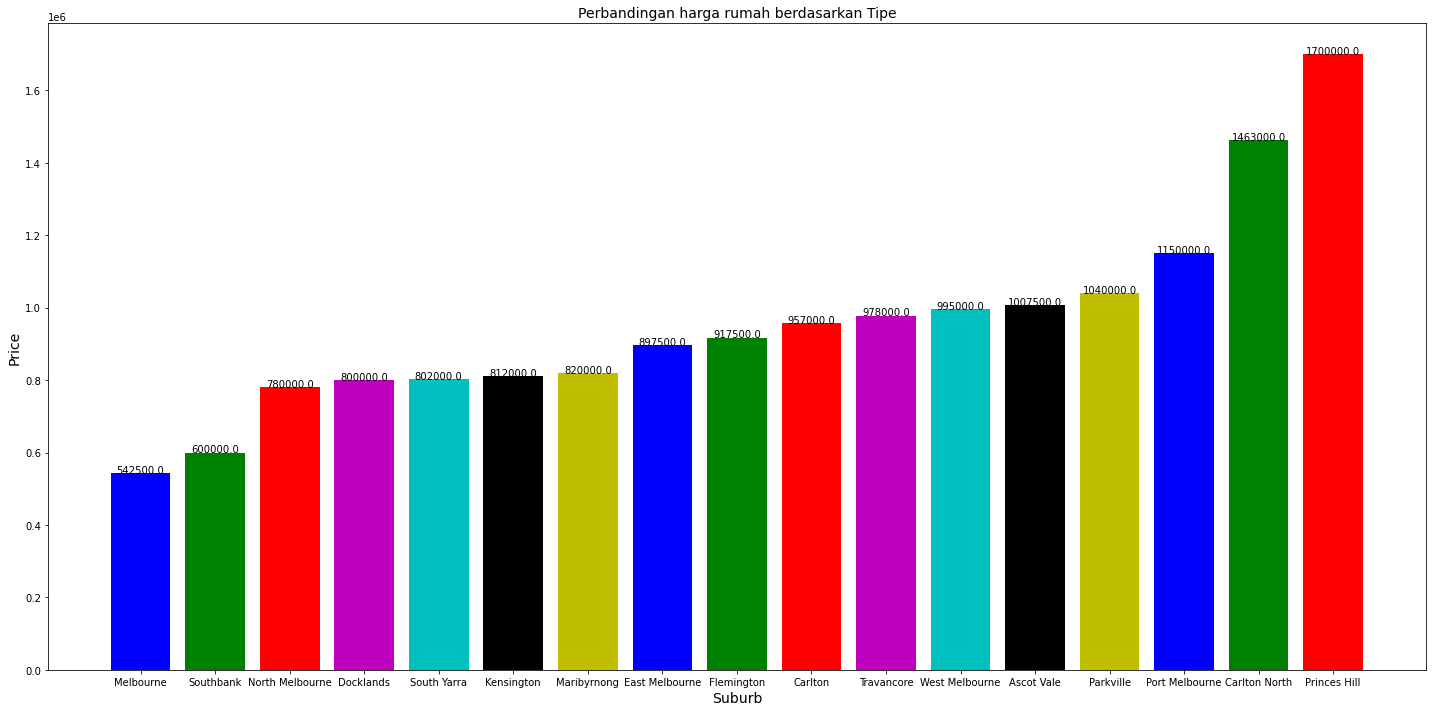

In [44]:
def addlabel (x,y):
     for i in range(len(x)):
        plt.text(i,y[i],y[i], ha='center')
plt.figure(figsize=(20,10))
x=pv_Suburb['Suburb']
y=pv_Suburb['Price']
plt.bar(x,y,color=['b','g','r','m','c','k','y'])
addlabel(x,y)
plt.xlabel('Suburb', size=14)
plt.ylabel('Price', size=14)
plt.title ('Perbandingan harga rumah berdasarkan Tipe', size=14)
plt.tight_layout()
plt.show()


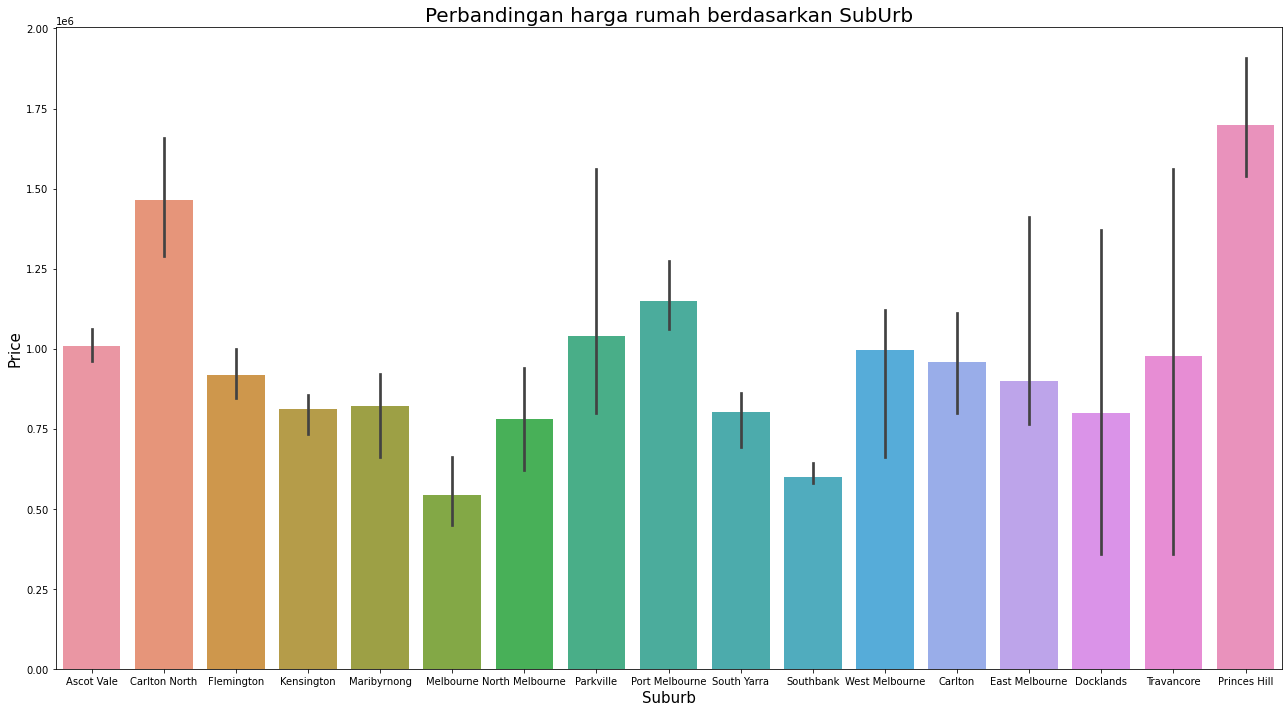

In [45]:
plt.figure(figsize=(18,10))
sns.barplot(data=df, x='Suburb', y='Price',estimator=np.median)
plt.xlabel('Suburb', size=15)
plt.ylabel('Price', size=15)
plt.title ('Perbandingan harga rumah berdasarkan SubUrb', size=20)
plt.tight_layout()
plt.show()


Rumah dengan harga paling mahal ada di SubUrb **PrincesHill (Med=1.700.000 AUD)** 

Rumah dengan harga paling murah ada di SubUrb **Melbourne (Med=542.500 AUD)**

In [46]:
# TYPE DENGAN PRICE
#Ho: Harga rumah di semua tipe adalah sama
#H1: Setidaknya harga satu pasang rumah  di salah satu tipe berbeda

stats,pval=kruskal(*[df[df['Type']==i]['Price'] for i in df['Type'].unique()])
print(pval)   
if pval<=0.05:
    print('Tolak Ho,Setidaknya harga satu pasang rumah  di salah satu tipe berbeda')
else:
    print('Terima Ho, Harga rumah di semua tipe adalah sama')    


1.0967384044342614e-122
Tolak Ho,Setidaknya harga satu pasang rumah  di salah satu tipe berbeda


In [47]:
type_price=df.groupby('Type').median()[['Price']].sort_values(by='Price').reset_index()
type_price

,Type,Price
0,u,573500.0
1,t,855000.0
2,h,1230000.0


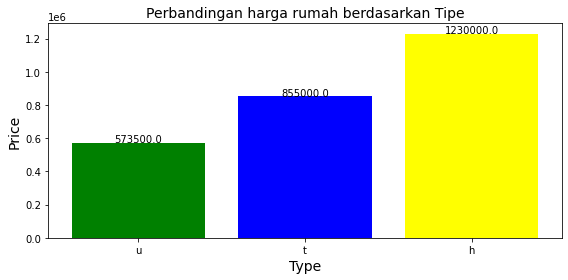

In [48]:
def addlabel (x,y):
     for i in range(len(x)):
        plt.text(i,y[i],y[i], ha='center')
plt.figure(figsize=(8,4))
x=type_price['Type']
y=type_price['Price']
plt.bar(x,y,color=['green','blue','yellow'])
addlabel(x,y)
plt.xlabel('Type', size=14)
plt.ylabel('Price', size=14)
plt.title ('Perbandingan harga rumah berdasarkan Tipe', size=14)
plt.tight_layout()
plt.show()


Rumah dengan harga paling mahal adalah  **tipe h (Med=1.230.000 AUD)** 

Rumah dengan harga paling murah adalah **tipe u (Med=573.500 AUD)**

In [49]:
# REGIONNAME DENGAN PRICE
#Ho: Harga rumah di setiap Region adalah sama
#H1: Setidaknya harga rumah di satu pasang Region berbeda

stats,pval=kruskal(*[df[df['Regionname']==i]['Price'] for i in df['Regionname'].unique()])
print(pval)   
if pval<=0.05:
    print('Tolak Ho, Setidaknya harga rumah di satu pasang Region berbeda')
else:
    print('Terima Ho, Harga rumah di setiap Region adalah sama')    

0.3358528132188839
Terima Ho, Harga rumah di setiap Region adalah sama


In [50]:
pv_reg=df.pivot_table(index='Regionname',values='Price',aggfunc='median').reset_index()
pv_reg

,Regionname,Price
0,Northern Metropolitan,857500.0
1,Southern Metropolitan,857000.0
2,Western Metropolitan,945000.0


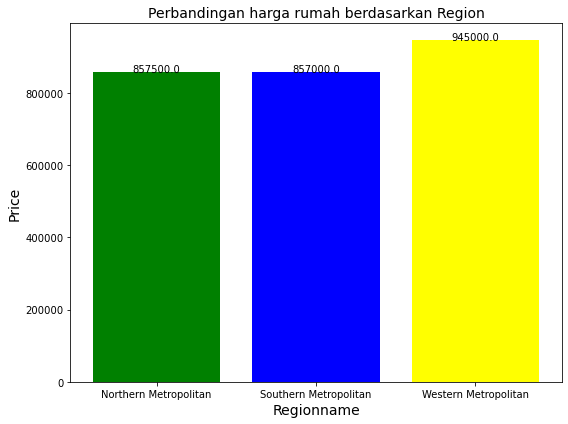

In [51]:
def addlabel (x,y):
     for i in range(len(x)):
        plt.text(i,y[i],y[i], ha='center')
plt.figure(figsize=(8,6))
x=pv_reg['Regionname']
y=pv_reg['Price']
plt.bar(x,y,color=['green','blue','yellow'])
addlabel(x,y)
plt.xlabel('Regionname', size=14)
plt.ylabel('Price', size=14)
plt.title ('Perbandingan harga rumah berdasarkan Region', size=14)
plt.tight_layout()
plt.show()

Rumah dengan harga paling mahal ada region Northern Metropolitan  **tipe h (Med=857.500 AUD)** 

Rumah dengan harga paling murah ada region Western Metropolitan **tipe u (Med=945.000 AUD)**

## Additional Analysis (Base on Date)
Kita akan melakukan analasis terhadap pola penjualan di waktu yang berbeda

### Datetime Analysis


In [56]:
# Cek data tipenya
df['Date'].dtype

dtype('O')

In [64]:
df['Date'].sort_values(ascending=False)

1119   2017-09-23
1116   2017-09-23
1117   2017-09-23
1118   2017-09-23
1122   2017-09-23
          ...    
258    2016-04-16
41     2016-04-16
411    2016-02-04
228    2016-02-04
227    2016-02-04
Name: Date, Length: 1129, dtype: datetime64[ns]

Rekaman data penjualan tahun 2016 dimulai pada bulan Feb-Des, sedangkan data penjualan tahun 2017 dimulai dari Jan-Sep

In [57]:
# Konversi date ke format Datetime dan simpan dalam bentuk ddmmyy
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")
df['Date']

0      2016-09-03
1      2016-12-03
2      2016-12-03
3      2017-03-04
4      2017-03-04
          ...    
1124   2017-08-26
1125   2017-08-26
1126   2017-08-26
1127   2017-08-26
1128   2017-08-26
Name: Date, Length: 1129, dtype: datetime64[ns]

In [58]:
# buat kolom month dan year 
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [59]:
# buat proporsi antara sales per bulan dengan total sales 
jan_sales = df['Price'].loc[df['Month'] == 1].sum()/df['Price'].sum()
feb_sales = df['Price'].loc[df['Month'] == 2].sum()/df['Price'].sum()
mar_sales = df['Price'].loc[df['Month'] == 3].sum()/df['Price'].sum()
apr_sales = df['Price'].loc[df['Month'] == 4].sum()/df['Price'].sum()
may_sales = df['Price'].loc[df['Month'] == 5].sum()/df['Price'].sum()
jun_sales = df['Price'].loc[df['Month'] == 6].sum()/df['Price'].sum()
jul_sales = df['Price'].loc[df['Month'] == 7].sum()/df['Price'].sum()
aug_sales = df['Price'].loc[df['Month'] == 8].sum()/df['Price'].sum()
sep_sales = df['Price'].loc[df['Month'] == 9].sum()/df['Price'].sum()
oct_sales = df['Price'].loc[df['Month'] == 10].sum()/df['Price'].sum()
nov_sales = df['Price'].loc[df['Month'] == 11].sum()/df['Price'].sum()
dec_sales = df['Price'].loc[df['Month'] == 12].sum()/df['Price'].sum()

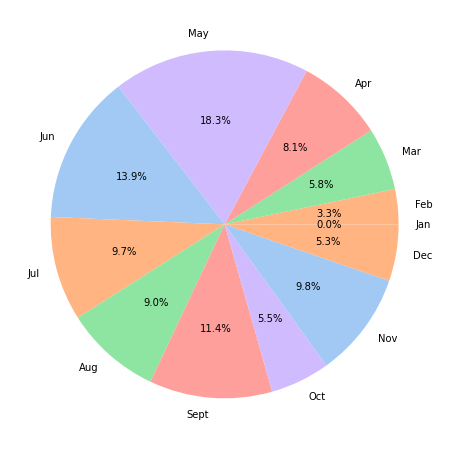

In [60]:
#define data
data = [jan_sales, feb_sales, mar_sales, apr_sales, may_sales, jun_sales, jul_sales, aug_sales, sep_sales, oct_sales,
       nov_sales, dec_sales ]
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

#tentukan warna
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(20,8))

#buat pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.1f%%')
plt.show()

* Dari visualisasi di atas, kita bisa melihat bahwa proporsi pembelian properti tertinggi ada di bulan May dan June. 
* Mulai dari Desember hingga Februari, kita dapat melihat proporsi penjualan berkurang dan kembali meningkat pada Maret hingga Mei dan kemudian turun secara bertahap.
* Pada bulan Januari, kita dapat mengamati proporsi penjualan yang minimal, setelah Feb kita dapat melihat peningkatan penjualan secara bertahap.

* Catatan penting bahwa rekaman penjualan pada bulan Oct, Nov, Dec 2017 belum dilakukan, sehingga proporsi data Oct, Nov, Dec berasal dari data 2016, serta proporsi data Jan berasal dari 2017 karena rekaman data penjualan di Jan 2016 tidak ditemukan


In [61]:
# buat proporsi antara sales per tahun dengan total sales 
sales_2016 = df['Price'].loc[df['Year'] == 2016].sum()/df['Price'].sum()
sales_2017 = df['Price'].loc[df['Year'] == 2017].sum()/df['Price'].sum()

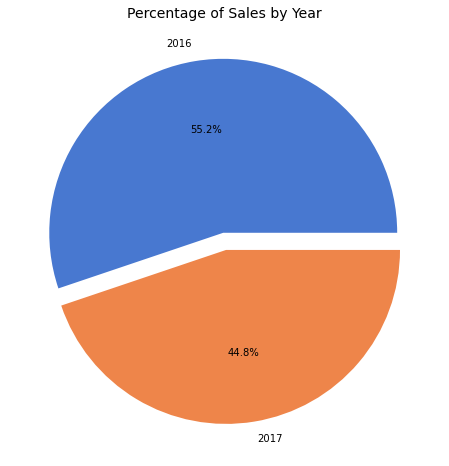

In [62]:
data = [sales_2016, sales_2017]
labels = ['2016', '2017']

#tentukan warna
colors = sns.color_palette('muted')[0:5]
plt.figure(figsize=(20,8))
plt.title("Percentage of Sales by Year", fontsize=14);

#buat pie chart
plt.pie(data, labels = labels, explode=[0.05]*2, colors = colors, autopct='%.1f%%',)
plt.show()

Dari visualisasi diatas, terlihat 55,2% dari properti terjual pada tahun 2016 dan 44,8% terjual pada tahun 2017. Hal tersebut belum dapat disimpulkan bahwa tahun 2016 memiliki penjualan yang lebih baik karena data pada tahun 2017 berhenti bulan September dan masih menyisakan 3 bulan waktu penjualan

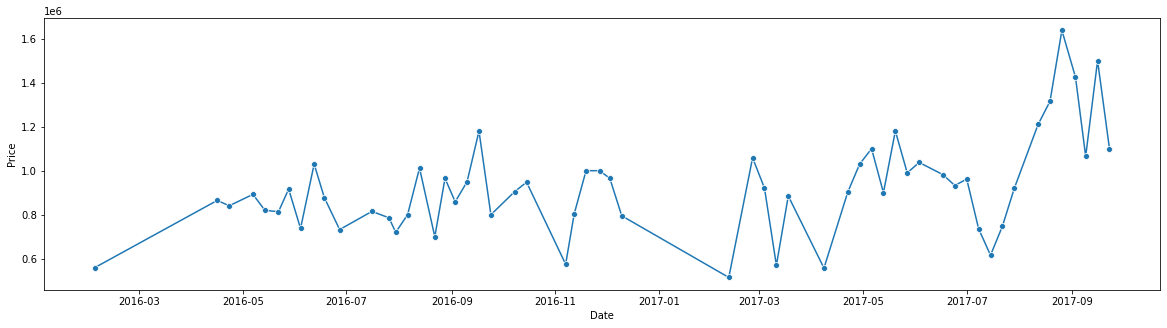

In [63]:
# Analisis time series dari harga penjualan 2016-2017 
plt.figure(figsize=(20,5))
sns.lineplot(data = df, x='Date',y='Price', ci=None, estimator='median', marker='o');

Dari uraian di atas, kita dapat mengamati banyak sekali variasi harga jual. Pada tahun tertentu, kita dapat melihat bagian waktu yang berbeda atau harga bulanan naik dan turun. Misalnya, di tahun 2017, sekitar bulan Februari atau Maret, harga turun ke titik terendah. Segera setelah ini, harga meningkat. Secara keseluruhan kita dapat melihat bahwa harga rata-rata rumah tetap mendekati 800k.

<AxesSubplot:title={'center':'Harga Penjualan per Bulan'}, xlabel='Month', ylabel='Price'>

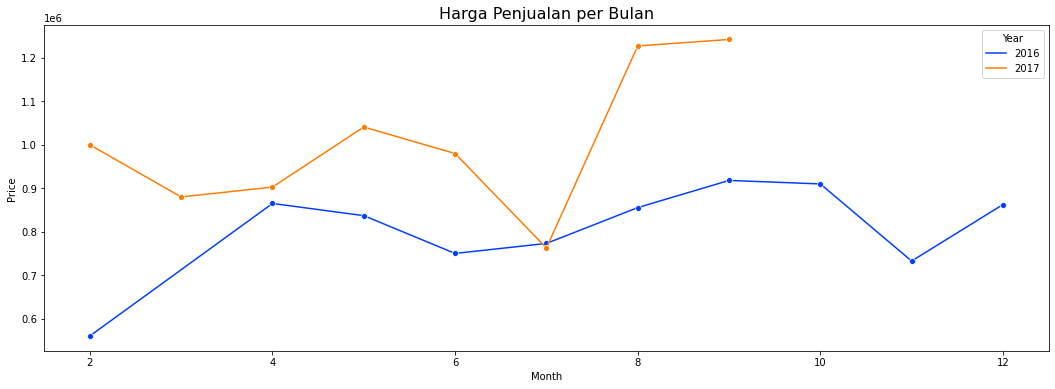

In [65]:
#Analisis harga penjualan per bulan
plt.figure(figsize=(18,6))
plt.title('Harga Penjualan per Bulan').set_fontsize('16') 
sns.lineplot(x='Month', y='Price', data=df, hue='Year', estimator='median', palette='bright', ci=None, marker='o',)

* Tahun 2016 kita dapat mengamati tren naik, dari Feb Penjualan harga naik, selama pertengahan mei harga turun dan kemudian mengikuti tren naik.
* Tahun 2017 kita bisa melihat median harga awal dari 100k kemudian turun di pertengahan Juli lalu naik di bulan Agustus dan kemudian perlahan meningkat.
* Penurunan harga terjadi pada interval bulan April - Juli

### Seasonality Anaylsis
Cek pembagian musim pada situs berikut [Melbourne Season](https://www.visitvictoria.com/practical-information/melbourne-weather#:~:text=With%20its%20variable%20climate%2C%20Melbourne,September%20to%20November%20(spring))

In [68]:
# Pembagian musim berdasarkan bulan
df['Season'] = np.nan
df.loc[(df['Month'] > 2) & (df['Month'] <= 5), 'Season'] = 'Autumn'
df.loc[(df['Month'] > 5) & (df['Month'] <= 8), 'Season'] = 'Winter'
df.loc[(df['Month'] > 8) & (df['Month'] <= 11), 'Season'] = 'Spring'
df.loc[df['Month'] <= 2, 'Season'] = 'Summer'
df.loc[df['Month'] == 12, 'Season'] = 'Summer'

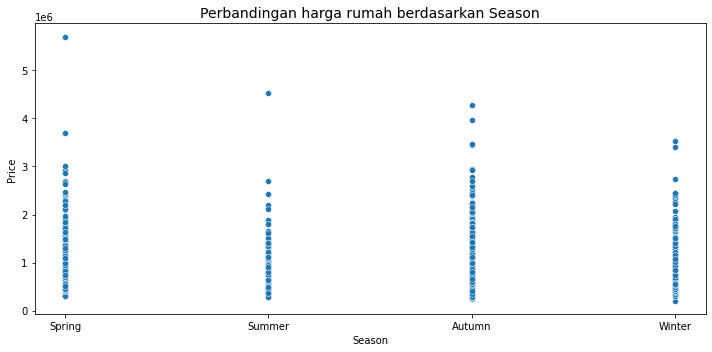

In [75]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="Season", y="Price", data=df,estimator=np.median)
plt.title ('Perbandingan harga rumah berdasarkan Season', size=14)
plt.tight_layout()
plt.show()

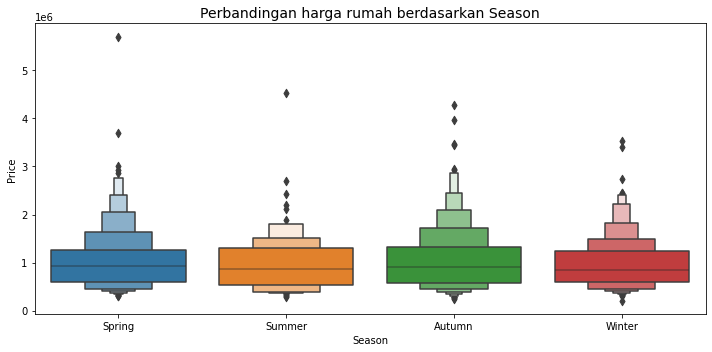

In [71]:
plt.figure(figsize=(10,5))
sns.boxenplot(x="Season", y="Price", data=df)
plt.title ('Perbandingan harga rumah berdasarkan Season', size=14)
plt.tight_layout()
plt.show()

Dari hasil visualisasi, didapatkan bahwa harga properti memiliki kenaikan tertinggi pada musim Autumn dan kenaikan terendah pada musim Summer

In [72]:
# Analisis harga dengan musim
spring_sales = df['Price'].loc[(df['Season']=='Spring')].sum()/df['Price'].sum()
summer_sales = df['Price'].loc[(df['Season']=='Summer')].sum()/df['Price'].sum()
autumn_sales = df['Price'].loc[(df['Season']=='Autumn')].sum()/df['Price'].sum()
winter_sales = df['Price'].loc[(df['Season']=='Winter')].sum()/df['Price'].sum()

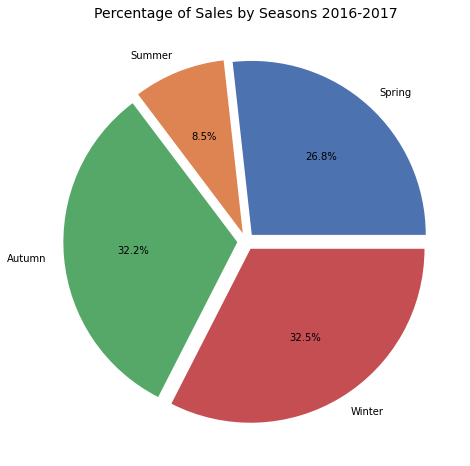

In [74]:
# buat pie chart
labels = ['Spring','Summer', 'Autumn', 'Winter']

#define data
data = [spring_sales, summer_sales, autumn_sales, winter_sales]

#tentukan warna
colors = sns.color_palette('deep')[0:5]

plt.figure(figsize=(15,8))
plt.title("Percentage of Sales by Seasons 2016-2017", fontsize=14);

plt.pie(data, labels = labels, explode=[0.05]*4, colors = colors, autopct='%.1f%%')
plt.show()

Dari gambar di atas, kita dapat mengobservasi bahwa proporsi Winter sekitar 32.5%, lalu Autumn 32.2%, dan Spring 26.8%. Summer Season memiliki proporsi terendah sebesar 8,5%


**Mari kita uraikan berdasarkan musim di tahun 2016 dan amati trennya**

In [77]:
# distribution penjualan per musim di tahun 2016
sales_2016 = df['Price'].loc[(df['Year']==2016)].sum()

spring_2016 = df['Price'].loc[(df['Year']==2016) & (df['Season']=='Spring')].sum()/sales_2016
summer_2016 = df['Price'].loc[(df['Year']==2016) & (df['Season']=='Summer')].sum()/sales_2016
autumn_2016 = df['Price'].loc[(df['Year']==2016) & (df['Season']=='Autumn')].sum()/sales_2016
winter_2016 = df['Price'].loc[(df['Year']==2016) & (df['Season']=='Winter')].sum()/sales_2016

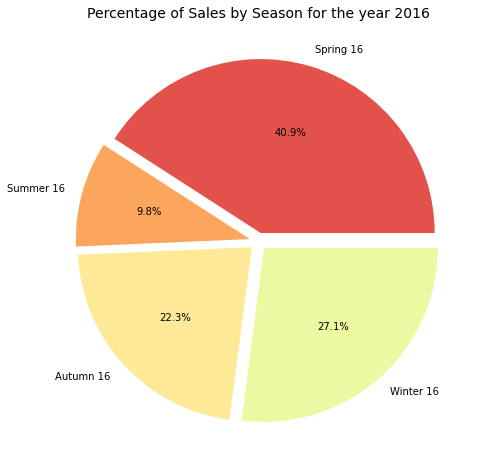

In [78]:
# distribution penjualan per musim di tahun 2016
labels = ['Spring 16','Summer 16', 'Autumn 16', 'Winter 16']
#define data
data = [spring_2016, summer_2016, autumn_2016, winter_2016]

#define color
colors = sns.color_palette('Spectral')[0:5]

plt.figure(figsize=(20,8))
plt.title("Percentage of Sales by Season for the year 2016", fontsize=14);

plt.pie(data, labels = labels, explode=[0.05]*4, colors = colors, autopct='%.1f%%')
plt.show();

**Mari kita uraikan berdasarkan musim di tahun 2017 dan amati trennya**

In [79]:
sales_2017 = df['Price'].loc[(df['Year']==2017)].sum()

spring_2017 = df['Price'].loc[(df['Year']==2017) & (df['Season']=='Spring')].sum()/sales_2017
summer_2017 = df['Price'].loc[(df['Year']==2017) & (df['Season']=='Summer')].sum()/sales_2017
autumn_2017 = df['Price'].loc[(df['Year']==2017) & (df['Season']=='Autumn')].sum()/sales_2017
winter_2017 = df['Price'].loc[(df['Year']==2017) & (df['Season']=='Winter')].sum()/sales_2017

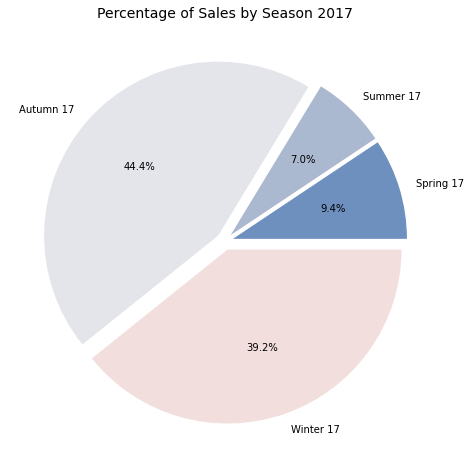

In [80]:
# Distribusi Penjualan per Musim di tahun 2017

labels = ['Spring 17','Summer 17', 'Autumn 17', 'Winter 17']
#define data
data = [spring_2017, summer_2017, autumn_2017, winter_2017]

#define color
colors = sns.color_palette('vlag')[0:5]

plt.figure(figsize=(20,8))
plt.title("Percentage of Sales by Season 2017", fontsize=14);

plt.pie(data, labels = labels, explode=[0.05]*4, colors = colors, autopct='%.1f%%')
plt.show();

* Pada tahun 2016, penjualan tertinggi terjadi pada Spring season dan penjualan terendah terjadi pada Summer season
* Pada tahun 2017, penjualan tertinggi terjadi pada Autumn season dan penjualan terendah terjadi pada Summer season


# Rekomendasi : 

Dari hasil analisis data, kami sebagai sales memberikan rekomendasi dengan cara melakukan bundling penjualan kepada customer berdasarkan range harga. Adapula paket penjualan dikategorikan ke dalam dua tipe, yaitu paket berdasarkan spesifikasi bangunan atau berdasarkan area. Berikut adalah detail paket yang kami tawarkan kepada customer:

**PaketSatu = Price < 570.000 AUD**
* Spesifikasi yang didapat berdasarkan bangunan: 
    * Rooms: 1 Room
    * Type: u,h,t
    * Bedroom2: 1 Bedroom
    * Landsize: small (Maksimal ukuran tanah: 142)
    * BuildingArea: small (Maksimal ukuran bangungan: 116)
* Opsi berdasarkan Area:    
    * Suburb: Melbourne, Maribyrnong
    * Regionname: Northern Metropolitan, Western Metropolitan

**PaketDua = Price dari 570.000 AUD hingga 1.280.000 AUD**
* Spesifikasi yang didapat berdasarkan bangunan: 
    * Rooms: 2-3 Rooms
    * Type: u,h,t
    * Bedroom2: 2-3 Bedrooms
    * Landsize: small, medium, large (Maksimal ukuran 37000)
    * BuildingArea: small, medium (Maksimal ukuran 286)
* Opsi berdasarkan Area:  
     * Suburb: Southbank, North Melbourne, Dockland, South Yarra, Kensington, Maribyrnong, East Melbourne, Flemington, Carlton, Travancore, West Melbourne, Ascot Vale, Parkvile, Port Melbourne
      * Regionname: Northern Metropolitan, Western Metropolitan, Southern Metropolitan

**PaketTiga = Price > 1.280.000 AUD**
* Spesifikasi yang didapat berdasarkan bangunan:
    * Rooms: 4-6 rooms
    * Type: u,h,t
    * Bedroom2:  4-6 Bedrooms
    * Landsize: small, medium, large (Maksimal ukuran 21700)
    * BuildingArea: small, medium, large (Maksimal Bangunan: 450)
* Opsi berdasarkan Area: 
    * Suburb: Carlton North, Pricess Hill
    * Regionname: Northern Metropolitan
    
 